In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

### **Load dataset**

In [ ]:
data=pd.read_csv("spam.csv", encoding="Latin-1")

In [ ]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
data=data[['v1','v2']]

In [ ]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
data['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [ ]:
data['v1']=data['v1'].map({'ham':'No Spam','spam':'Spam'})

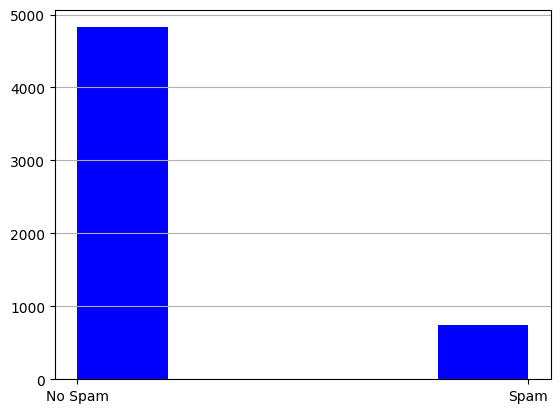

In [ ]:
plt.hist(data['v1'], color='b',bins=5)
plt.grid(axis='y')
plt.show()

In [ ]:
y=np.asarray(data['v1'])
x=np.asarray(data['v2'])

In [ ]:
model=MultinomialNB()

In [ ]:
cv=text.CountVectorizer()

In [ ]:
X=cv.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
spam_predict=model.predict(x_test)

Classifaction Report:               precision    recall  f1-score   support

     No Spam       0.99      0.99      0.99       965
        Spam       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy Score: 0.97847533632287


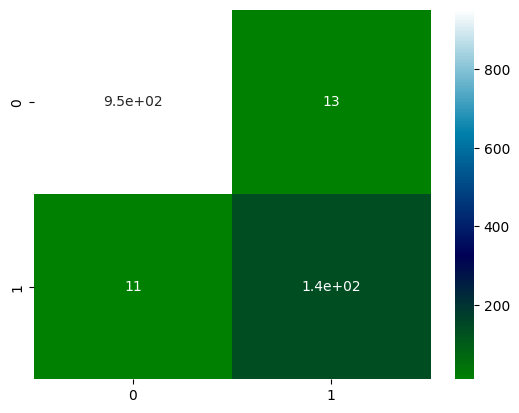

In [ ]:
print("Classifaction Report:", classification_report(y_test, spam_predict))
print('Accuracy Score:', accuracy_score(y_test, spam_predict))

spam_con_mat=confusion_matrix(y_test, spam_predict)
sns.heatmap(spam_con_mat, annot=True, cmap='ocean')
plt.show()